<a href="https://colab.research.google.com/github/azizadila/H8_062/blob/main/PYTN_Assgn_1_Batch_062_Aziza_Noor_Fadhila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORT NUMPY DAN PANDAS

import numpy as np
import pandas as pd
from PIL import Image


In [ ]:
# EXTRACT DATA FROM GDRIVE

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Assignment 1/london_crime_by_lsoa.csv")

print('Data has been downloaded and read into a dataframe')


# CLEANSING DATA (RENAME, DAN HAPUS KOLOM) #

df.rename(columns={'borough':'town'},inplace=True) 
df.drop(['lsoa_code','month'],axis=1,inplace=True)

print('data dimensions:', df.shape)

print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data has been downloaded and read into a dataframe
data dimensions: (399, 5)
         town               major_category  ... value  year
0     Croydon                     Burglary  ...     0  2016
1   Greenwich  Violence Against the Person  ...     0  2016
2     Bromley  Violence Against the Person  ...     0  2015
3   Redbridge                     Burglary  ...     0  2016
4  Wandsworth                      Robbery  ...     0  2008

[5 rows x 5 columns]


In [ ]:
#VISUALIZING DATA USING MATPLOTLIB

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print('matplotlib version',mpl.__version__)


matplotlib version 3.2.2


                major_category  value
7           Theft and Handling     66
8  Violence Against the Person     52
1              Criminal Damage     16
0                     Burglary     12
2                        Drugs     12
5                      Robbery      8
4    Other Notifiable Offences      6
3             Fraud or Forgery      0
6              Sexual Offences      0


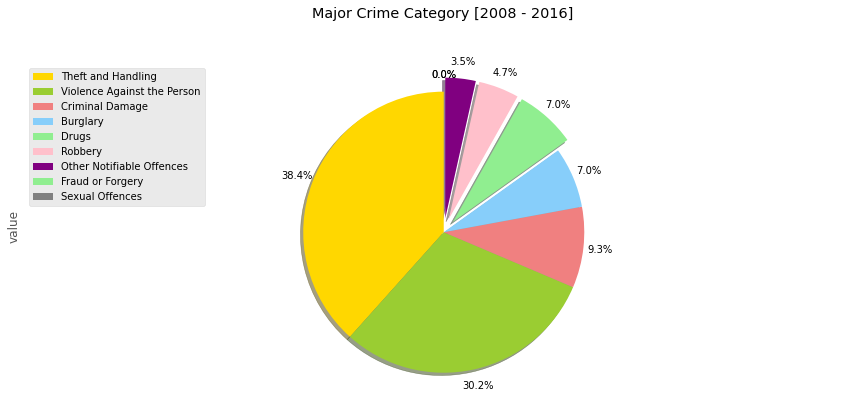

In [ ]:
#MEMBUAT PIE CHART DARI MAJOR CATEGORY

#GROUPING DATA YANG AKAN DIBUAT PIE CHART
df_major= df.groupby(['major_category'])['value'].sum().reset_index()
df_major.sort_values(by=['value'],inplace=True,ascending=False)
print(df_major)

#PEMILIHAN WARNA PIE CHART DAN JARAK ANTAR PIE CHART
colors_list = ['gold','yellowgreen','lightcoral','lightskyblue','lightgreen','pink','purple','lightgreen','grey','purple']
explode_list = [0,0,0,0,0.1,0.1,0.1,0,0]

df_major['value'].plot(kind='pie',
              figsize=(15,6),
              autopct='%1.1f%%',
              startangle=90,
              shadow=True,
              labels=None,
              pctdistance=1.12,
              colors=colors_list,
              explode=explode_list,
)

plt.title('Major Crime Category [2008 - 2016]',y=1.12)
plt.axis('equal')

plt.legend(labels=df_major['major_category'],loc='upper left')
plt.show()


Kesimpulan :
*   Dari Pie Chart diatas dapat disimpulkan bahwa major_category yang sering terjadi adalah Theft and Handling dan Violence Against the Person
*   Sedangkan untuk major_category yang jarang terjadi atau paling sedikit terjadi ada pada Other Notifiable Offences dan juga Sexual Offences





   year  value
0  2008     31
1  2009     19
2  2010     17
3  2011     22
4  2012     23
5  2013     10
6  2014     20
7  2015      9
8  2016     21


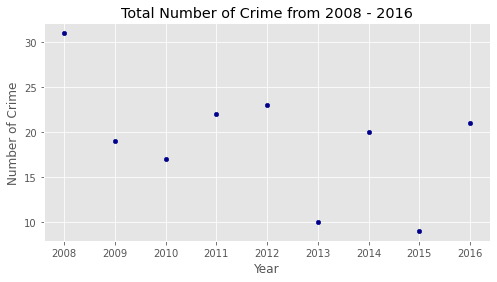

In [ ]:
#MEMBUAT SCATTER PLOT DARI MAJOR CATEGORY

#GROUPING DATA YANG AKAN DIBUAT SCATTER PLOT
df_year=df.groupby(['year'])['value'].sum().reset_index()
print(df_year)

df_year.plot(kind='scatter',x='year',y='value',figsize=(8,4),color='darkblue')
plt.title('Total Number of Crime from 2008 - 2016',y=1)
plt.ylabel('Number of Crime')
plt.xlabel('Year')
plt.show()

Kesimpulan :


*   Dari Scatter Plot diatas, dapat dilihat bahwa total crime pada setiap tahunnya cenderung turun-naik
*   Pada tahun 2013 dan 2015 terjadi penurunan tetapi kembali naik di tahun 2014 dan 2016



year
2016    6
2008    5
2013    3
2014    1
2015    0
2012    0
2011    0
2010    0
2009    0
Name: value, dtype: int64


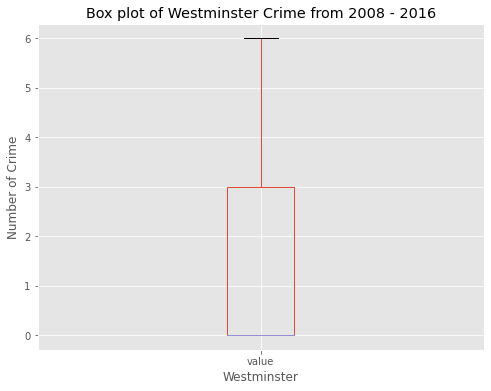

In [ ]:
#MEMBUAT BOX PLOT DARI MAJOR CATEGORY

#FILTER KOTA
df_box = df[(df['town']=='Westminster')] 

#GROUPING DATA YANG AKAN DIBUAT BOX PLOT
df_box2 = df_box.groupby(['year'],as_index=True)['value'].sum()
df_box2.sort_values(inplace=True,ascending=False)
print(df_box2)

df_box2.plot(kind='box',figsize=(8,6))

plt.title('Box plot of Westminster Crime from 2008 - 2016')
plt.ylabel('Number of Crime')
plt.xlabel('Westminster')
plt.show()

Kesimpulan :


Nilai minimum *crime* di Westminster adalah 0, maximum *crime* adalah 6, dan mediannya adalah 0



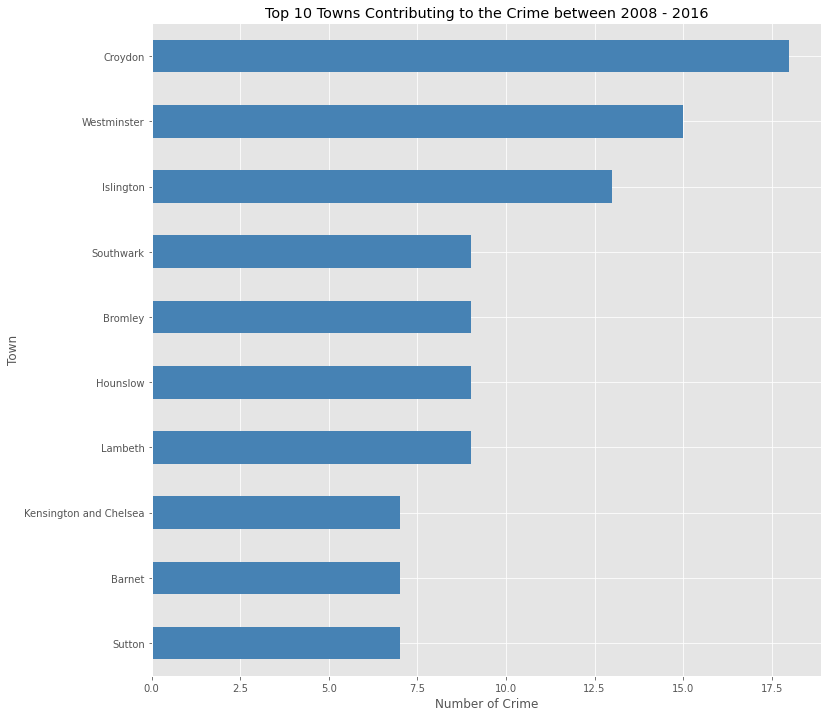

In [ ]:
#MEMBUAT BAR CHART DARI MAJOR CATEGORY

#GROUPING DATA YANG AKAN DIBUAT BAR CHART
df_year = df.groupby(['town'],as_index=True)['value'].sum()
df_year.sort_values(inplace=True,ascending=True)
#print(df_year)

#MEMILIH 10 URUTAN PALING BAWAH DARI DATA YANG TELAH DIPILIH DAN DI-SORT
df_top10 = df_year.tail(10)

#print(df_top10)

df_top10.plot(kind='barh',figsize=(12,12),color='steelblue')
plt.xlabel('Number of Crime')
plt.ylabel('Town')
plt.title('Top 10 Towns Contributing to the Crime between 2008 - 2016',y=1)

plt.show()


Kesimpulan :



Dari bar chart diatas dapat disimpulkan bahwa Croydon, Westminster, Islington, Soutwark, Bromley, Hounslow, Lambeth, Kensington and Chelsea, Barnet, Sutton adalah 10 kota dengan tingkat *crime* tertinggi


town
Greenwich                  0
Hillingdon                 1
Tower Hamlets              1
Richmond upon Thames       1
Kingston upon Thames       1
Bexley                     2
Wandsworth                 2
Enfield                    2
Merton                     3
Hammersmith and Fulham     3
Barking and Dagenham       3
Hackney                    3
Camden                     3
Brent                      4
Harrow                     4
Ealing                     5
Redbridge                  5
Newham                     5
Lewisham                   5
Havering                   5
Haringey                   5
Waltham Forest             6
Sutton                     7
Barnet                     7
Kensington and Chelsea     7
Lambeth                    9
Hounslow                   9
Bromley                    9
Southwark                  9
Islington                 13
Westminster               15
Croydon                   18
Name: value, dtype: int64


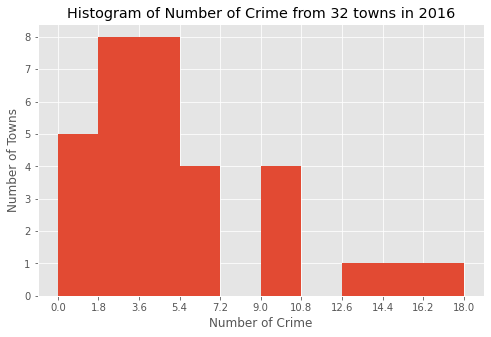

In [ ]:
#MEMBUAT HISTOGRAM DARI MAJOR CATEGORY

#FILTER TAHUN
df_hist = df[(df['year']==2016)]

#GROUPING DATA YANG AKAN DIBUAT HISTOGRAM
df_hist2 = df.groupby(['town'],as_index=True)['value'].sum()
df_hist2.sort_values(inplace=True,ascending=True)
print(df_hist2)

count,bin_edges = np.histogram(df_hist2)
df_hist2.plot(kind='hist',figsize=(8,5),xticks=bin_edges)
plt.title('Histogram of Number of Crime from 32 towns in 2016')
plt.ylabel('Number of Towns')
plt.xlabel('Number of Crime')

plt.show()

Kesimpulan :



*   Terdapat 5 kota dengan kejahatan antara 0 - 1,8
*   Terdapat 8 kota dengan kejahatan antara 1.8 - 3.6
*   dst





town  Croydon  Westminster  Islington
year                                 
2008      1.0          5.0        5.0
2009      1.0          0.0        1.0
2010      1.0          0.0        2.0
2011      4.0          0.0        0.0
2012      9.0          0.0        0.0
2013      0.0          3.0        0.0
2014      2.0          1.0        5.0
2015      0.0          0.0        0.0
2016      0.0          6.0        0.0


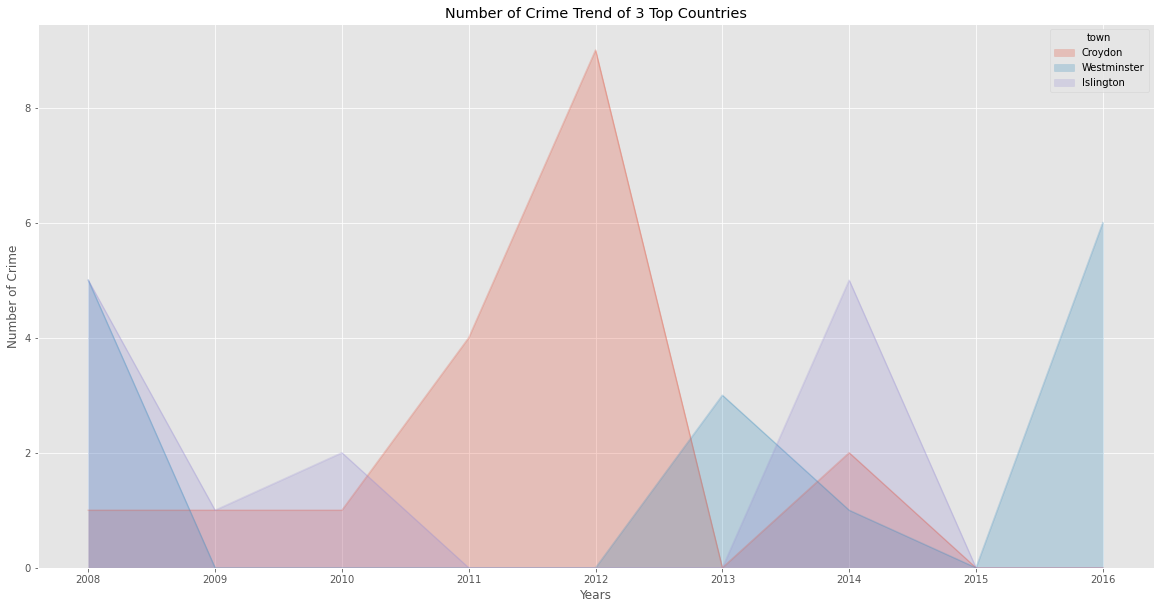

In [ ]:
#MEMBUAT AREA PLOT

#GROUPING DATA -> DIURUTKAN BERDASARKAN TAHUN DAN JUMLAH DATA PER TAHUN
df_area = df.groupby(['town','year'],as_index = False).sum().pivot('town','year').fillna(0)
df_area['Total'] = df_area.sum(axis= 1)
df_area.sort_values(['Total'],inplace=True,ascending=False)

#MENCARI TOP 3 NEGARA DENGAN JUMLAH KEJAHATAN/CRIME TAHUNAN TERTINGGI
df_top3 = df_area.head(3)
df_top3 = df_top3['value'].transpose()

print(df_top3)

df_top3.index = df_top3.index.map(int)

df_top3.plot(kind='area',
             alpha=0.25,
             stacked=False,
             figsize=(20,10)
             )

plt.title('Number of Crime Trend of 3 Top Countries')
plt.ylabel('Number of Crime')
plt.xlabel('Years')

plt.show()

Kesimpulan :


1.   Area plot diatas menggambarkan perubahan angka kejahatan / *crime* pada setiap tahunnya pada 3 negara
2.   Croydon memiliki angka kejahatan tertinggi pada tahun 2011 - 2012

